In [6]:
# ----- LIBS
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

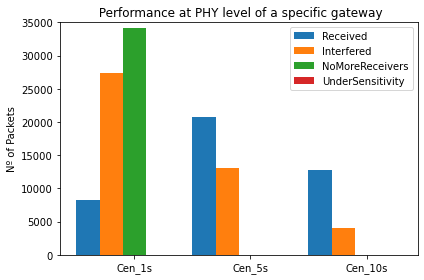

In [2]:
labels = ['Cen_1s', 'Cen_5s', 'Cen_10s'] # tempo de Simulação 1h

received = [8306, 20774, 12797 ]
interfered = [27334, 13061, 4123]
noMoreReceivers = [34155, 0, 0]
underSensitivity = [0, 0, 0 ]


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, received, width, label='Received')
rects2 = ax.bar(x - width, interfered, width, label='Interfered')
rects3 = ax.bar(x , noMoreReceivers, width, label='NoMoreReceivers')
rects4 = ax.bar(x + width, underSensitivity, width, label='UnderSensitivity')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nº of Packets')
ax.set_title(' Performance at PHY level of a specific gateway')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0,35000]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)

fig.tight_layout()

plt.show()
fig.savefig('phy_performance.png',bbox_inches='tight')

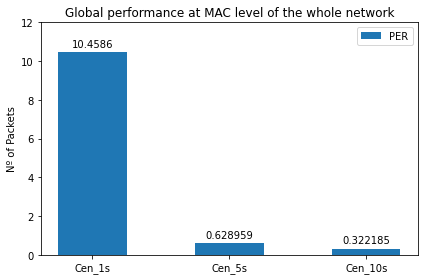

In [3]:
labels = ['Cen_1s', 'Cen_5s', 'Cen_10s'] # tempo de Simulação 1h

per = [10.4586, 0.628959, 0.322185 ]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, per, width, label='PER')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nº of Packets')
ax.set_title('Global performance at MAC level of the whole network')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 12]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('per.png',bbox_inches='tight')

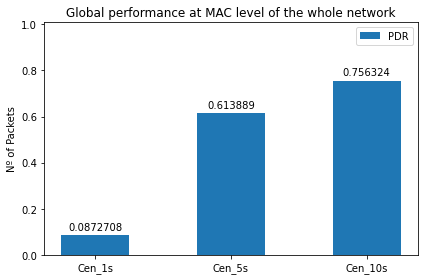

In [5]:
labels = ['Cen_1s', 'Cen_5s', 'Cen_10s'] # tempo de Simulação 1h

pdr = [0.0872708, 0.613889, 0.756324]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, pdr, width, label='PDR')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nº of Packets')
ax.set_title('Global performance at MAC level of the whole network')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, max(pdr) + max(pdr)/3]) 
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()
fig.savefig('pdr.png',bbox_inches='tight')

In [19]:
# ----- NETWORK DATASET

network_df = pd.read_csv("network_results_coletores_unicamp.txt", header=None) 
network_df.columns = ["ed_id", "ed_x", "ed_y","ed_z","sf", "gwId", "gw_x", "gw_y", "gw_z", "distance"]
print("Total rows:", len(network_df))
network_df.head(5)

Total rows: 120000


,ed_id,ed_x,ed_y,ed_z,sf,gwId,gw_x,gw_y,gw_z,distance
0,0,109.5180,975.464,1,7,100,1694.97,2141.47,44.9188,1968.55
1,1,362.2410,-910.471,1,7,100,1694.97,2141.47,44.9188,3330.53
2,2,-50.1262,714.268,1,7,100,1694.97,2141.47,44.9188,2254.82
3,3,711.7070,-461.744,1,7,100,1694.97,2141.47,44.9188,2783.07
4,4,-739.4260,-198.579,1,7,100,1694.97,2141.47,44.9188,3376.99


In [30]:
# ----- PLOT SIZE SETTINGS

# chart bounds
xMin_bound, xMax_bound = -2500, 2500
yMin_bound, yMax_bound = -2500, 2500 

# chart figsize
x_figsize, y_figsize = 5, 5


In [20]:
# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
    
    # circle
#     circle_lgd = mlines.Line2D([], [],
#                               color = 'white',
#                               marker = 'o',
#                               markeredgecolor = 'black',
#                               markeredgewidth = 0.5,
#                               markerfacecolor = 'white',
#                               markersize = 15,
#                               label='Radio Coverage')

#     plots_legends.append(circle_lgd)
    
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = 'o',
                                  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5,
                                  markerfacecolor = colors[sf],
                                  markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [],
                                  color = 'white',
                                  marker = (5,2),
                                  markeredgecolor = 'red',
                                  markeredgewidth = 0.5,
                                  markerfacecolor = 'red',
                                  markersize = 15, 
                                  label = 'GW')

    plots_legends.append(scatter_lgd)
    
    return plots_legends

In [21]:
# ----- EDs LISTS per SF

eds_x_sf7 = []
eds_y_sf7 = []
eds_x_sf8 = []
eds_y_sf8 = []
eds_x_sf9 = []
eds_y_sf9 = []
eds_x_sf10 = []
eds_y_sf10 = []
eds_x_sf11 = []
eds_y_sf11 = []
eds_x_sf12 = []
eds_y_sf12 = []

for i in range (len(network_df)):
    if network_df.iloc[i].sf == 7.0:
        eds_x_sf7.append(network_df.iloc[i].ed_x)
        eds_y_sf7.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 8.0:
        eds_x_sf8.append(network_df.iloc[i].ed_x)
        eds_y_sf8.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 9.0:
        eds_x_sf9.append(network_df.iloc[i].ed_x)
        eds_y_sf9.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 10.0:
        eds_x_sf10.append(network_df.iloc[i].ed_x)
        eds_y_sf10.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 11.0:
        eds_x_sf11.append(network_df.iloc[i].ed_x)
        eds_y_sf11.append(network_df.iloc[i].ed_y)
    if network_df.iloc[i].sf == 12.0:
        eds_x_sf12.append(network_df.iloc[i].ed_x)
        eds_y_sf12.append(network_df.iloc[i].ed_y)

In [ ]:
# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw a circle
# a_circle = plt.Circle((0, 0), xMax_bound, fill= False, linestyle = '--', linewidth = 1.5, label='Radio Coverage')
# ax.add_artist(a_circle)

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(network_df.iloc[0].gw_x, network_df.iloc[0].gw_y, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.7, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
# fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')